# cricket player perfomance prediction using machine learning

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Batsman_Data.csv")
df

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11144,11145,46,46,61,75.40,6,1,v Ireland,Dehradun,28 Feb 2019,ODI # 4100,Gulbadin Naib,352048
11145,11146,3,3,6,50.00,0,0,v Ireland,Dehradun,2 Mar 2019,ODI # 4101,Gulbadin Naib,352048
11146,11147,1,1,8,12.50,0,0,v Ireland,Dehradun,8 Mar 2019,ODI # 4108,Gulbadin Naib,352048
11147,11148,DNB,-,-,-,-,-,v Scotland,Edinburgh,10 May 2019,ODI # 4131,Gulbadin Naib,352048


In [3]:
df.shape

(11149, 13)

In [4]:
df.columns

Index(['Unnamed: 0', 'Bat1', 'Runs', 'BF', 'SR', '4s', '6s', 'Opposition',
       'Ground', 'Start Date', 'Match_ID', 'Batsman', 'Player_ID'],
      dtype='object')

In [5]:
df.head(5)

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


In [6]:
df.tail(5)

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
11144,11145,46,46,61,75.40,6,1,v Ireland,Dehradun,28 Feb 2019,ODI # 4100,Gulbadin Naib,352048
11145,11146,3,3,6,50.00,0,0,v Ireland,Dehradun,2 Mar 2019,ODI # 4101,Gulbadin Naib,352048
11146,11147,1,1,8,12.50,0,0,v Ireland,Dehradun,8 Mar 2019,ODI # 4108,Gulbadin Naib,352048
11147,11148,DNB,-,-,-,-,-,v Scotland,Edinburgh,10 May 2019,ODI # 4131,Gulbadin Naib,352048
11148,11149,TDNB,-,-,-,-,-,v Ireland,Belfast,19 May 2019,ODI # 4139,Gulbadin Naib,352048


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11149 entries, 0 to 11148
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11149 non-null  int64 
 1   Bat1        11149 non-null  object
 2   Runs        11149 non-null  object
 3   BF          11149 non-null  object
 4   SR          11149 non-null  object
 5   4s          11149 non-null  object
 6   6s          11149 non-null  object
 7   Opposition  11149 non-null  object
 8   Ground      11149 non-null  object
 9   Start Date  11149 non-null  object
 10  Match_ID    11149 non-null  object
 11  Batsman     11149 non-null  object
 12  Player_ID   11149 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 1.1+ MB


In [8]:
df.describe()

,Unnamed: 0,Player_ID
count,11149.00000,1.114900e+04
mean,5575.00000,2.259088e+05
std,3218.58341,1.942613e+05
min,1.00000,5.334000e+03
25%,2788.00000,4.749200e+04
50%,5575.00000,2.335140e+05
75%,8362.00000,3.217770e+05
max,11149.00000,1.158100e+06


# Null values

In [9]:
df.isnull().sum()

Unnamed: 0    0
Bat1          0
Runs          0
BF            0
SR            0
4s            0
6s            0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Batsman       0
Player_ID     0
dtype: int64

In [10]:
#Dropping all the values with 'Did not Bat (DNB)'
df.drop(df[df.Bat1 == 'DNB'].index, inplace=True)
df.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
5,6,0*,0,8,0.00,0,0,v India,Dhaka,10 Jan 2010,ODI # 2941,Oshane Thomas,49619
6,7,0*,0,0,-,0,0,v England,The Oval,28 Jun 2011,ODI # 3165,Oshane Thomas,49619
9,10,1*,1,3,33.33,0,0,v England,Nottingham,6 Jul 2011,ODI # 3169,Oshane Thomas,49619
10,11,0*,0,2,0.00,0,0,v Australia,Pallekele,10 Aug 2011,ODI # 3175,Oshane Thomas,49619
11,12,0,0,2,0.00,0,0,v Pakistan,Dubai (DSC),11 Nov 2011,ODI # 3212,Oshane Thomas,49619


In [11]:
#To Convert required columns into float we have to replace and remove some string elements
df['Bat1'] = df['Bat1'].str.replace('*', '.')
df['SR'] = df['SR'].str.replace('-', '0')
df['Runs'] = df['Runs'].str.replace('-', '0')
df['4s'] = df['4s'].str.replace('-', '0')
df['6s'] =df['6s'].str.replace('-', '0')
df.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
5,6,0.,0,8,0.00,0,0,v India,Dhaka,10 Jan 2010,ODI # 2941,Oshane Thomas,49619
6,7,0.,0,0,0,0,0,v England,The Oval,28 Jun 2011,ODI # 3165,Oshane Thomas,49619
9,10,1.,1,3,33.33,0,0,v England,Nottingham,6 Jul 2011,ODI # 3169,Oshane Thomas,49619
10,11,0.,0,2,0.00,0,0,v Australia,Pallekele,10 Aug 2011,ODI # 3175,Oshane Thomas,49619
11,12,0,0,2,0.00,0,0,v Pakistan,Dubai (DSC),11 Nov 2011,ODI # 3212,Oshane Thomas,49619


In [12]:
#Converting all required columns into float
df['SR']=df['SR'].astype(float)
df['Runs']=df['Runs'].astype(float)
df['4s']=df['4s'].astype(float)
df['6s']=df['6s'].astype(float)

In [13]:
#Checking the datatype
df.dtypes

Unnamed: 0      int64
Bat1           object
Runs          float64
BF             object
SR            float64
4s            float64
6s            float64
Opposition     object
Ground         object
Start Date     object
Match_ID       object
Batsman        object
Player_ID       int64
dtype: object

In [14]:
bd_induvidual = df.query('Batsman =="Shimron Hetmyer"')
bd_induvidual

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
367,368,29,29.0,42,69.04,4.0,0.0,v New Zealand,Whangarei,20 Dec 2017,ODI # 3943,Shimron Hetmyer,670025
368,369,2,2.0,4,50.00,0.0,0.0,v New Zealand,Christchurch,23 Dec 2017,ODI # 3944,Shimron Hetmyer,670025
369,370,127,127.0,93,136.55,14.0,4.0,v U.A.E.,Harare,6 Mar 2018,ODI # 3987,Shimron Hetmyer,670025
370,371,8,8.0,12,66.66,1.0,0.0,v P.N.G.,Harare,8 Mar 2018,ODI # 3991,Shimron Hetmyer,670025
371,372,36,36.0,40,90.00,3.0,1.0,v Ireland,Harare,10 Mar 2018,ODI # 3993,Shimron Hetmyer,670025
372,373,15,15.0,22,68.18,1.0,0.0,v Afghanistan,Harare,15 Mar 2018,ODI # 3997,Shimron Hetmyer,670025
373,374,13,13.0,7,185.71,0.0,1.0,v Zimbabwe,Harare,19 Mar 2018,ODI # 4002,Shimron Hetmyer,670025
374,375,4,4.0,11,36.36,0.0,0.0,v Scotland,Harare,21 Mar 2018,ODI # 4004,Shimron Hetmyer,670025
375,376,38,38.0,51,74.50,3.0,0.0,v Afghanistan,Harare,25 Mar 2018,ODI # 4007,Shimron Hetmyer,670025
376,377,52,52.0,78,66.66,5.0,0.0,v Bangladesh,Providence,22 Jul 2018,ODI # 4022,Shimron Hetmyer,670025


In [15]:
againstindia = bd_induvidual.query('Opposition == "v India"')
againstindia

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
379,380,106,106.0,78,135.89,6.0,6.0,v India,Guwahati,21 Oct 2018,ODI # 4056,Shimron Hetmyer,670025
380,381,94,94.0,64,146.87,4.0,7.0,v India,Visakhapatnam,24 Oct 2018,ODI # 4059,Shimron Hetmyer,670025
381,382,37,37.0,21,176.19,2.0,3.0,v India,Pune,27 Oct 2018,ODI # 4062,Shimron Hetmyer,670025
382,383,13,13.0,11,118.18,2.0,0.0,v India,Mumbai (BS),29 Oct 2018,ODI # 4063,Shimron Hetmyer,670025
383,384,9,9.0,11,81.81,1.0,0.0,v India,Thiruvananthapuram,1 Nov 2018,ODI # 4064,Shimron Hetmyer,670025


<BarContainer object of 5 artists>

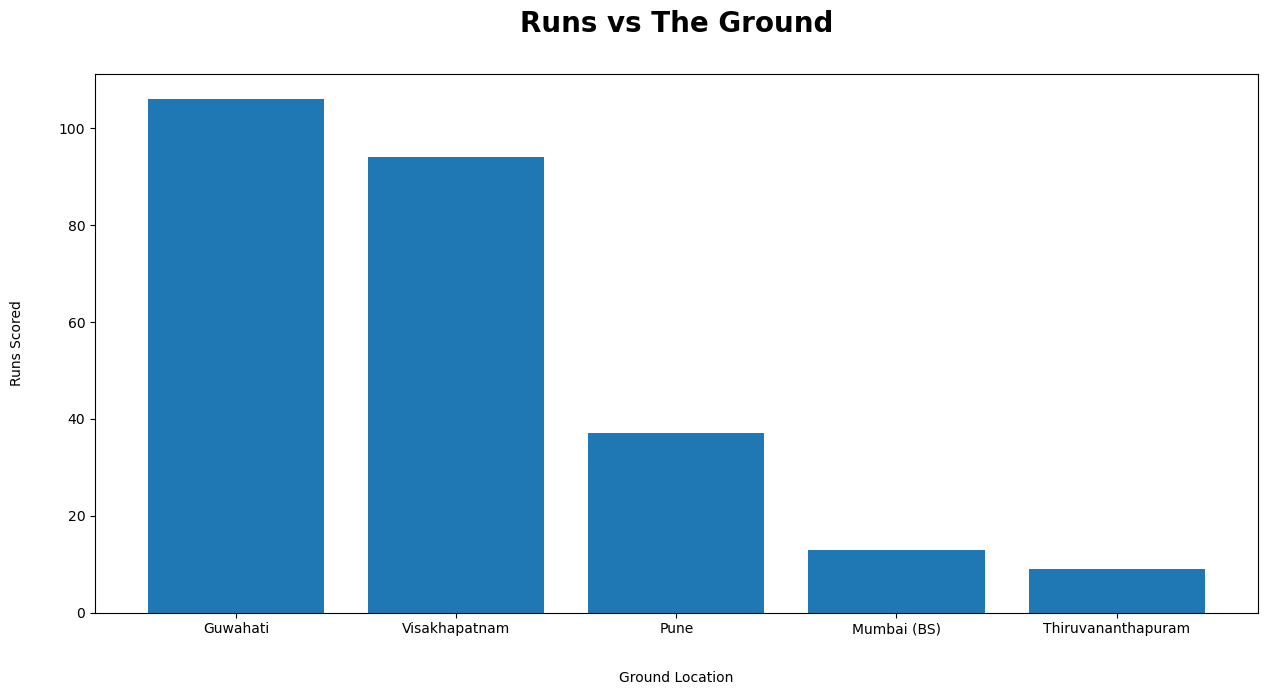

In [16]:
plt.figure(figsize=(15,7))
x = againstindia['Ground']
y = againstindia['Runs']
plt.xlabel('Ground Location', labelpad=25)
plt.ylabel('Runs Scored', labelpad=25)
plt.title('Runs vs The Ground', fontweight='bold', pad=30, fontsize=20)
plt.bar(x, y)

# Top 100 batsmen with highest macthes/data

In [17]:
new = df['Batsman'].value_counts()[:100]
new

MS Dhoni               294
Chris Gayle            288
Shoaib Malik           255
Virat Kohli            222
Ross Taylor            209
                      ... 
Hasan Ali               26
Shimron Hetmyer         25
Andile Phehlukwayo      25
Milinda Siriwardana     24
Kagiso Rabada           24
Name: Batsman, Length: 100, dtype: int64

In [18]:
bd_induvidual = df.query('Batsman =="Shimron Hetmyer"')
bd_induvidual

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
367,368,29,29.0,42,69.04,4.0,0.0,v New Zealand,Whangarei,20 Dec 2017,ODI # 3943,Shimron Hetmyer,670025
368,369,2,2.0,4,50.00,0.0,0.0,v New Zealand,Christchurch,23 Dec 2017,ODI # 3944,Shimron Hetmyer,670025
369,370,127,127.0,93,136.55,14.0,4.0,v U.A.E.,Harare,6 Mar 2018,ODI # 3987,Shimron Hetmyer,670025
370,371,8,8.0,12,66.66,1.0,0.0,v P.N.G.,Harare,8 Mar 2018,ODI # 3991,Shimron Hetmyer,670025
371,372,36,36.0,40,90.00,3.0,1.0,v Ireland,Harare,10 Mar 2018,ODI # 3993,Shimron Hetmyer,670025
372,373,15,15.0,22,68.18,1.0,0.0,v Afghanistan,Harare,15 Mar 2018,ODI # 3997,Shimron Hetmyer,670025
373,374,13,13.0,7,185.71,0.0,1.0,v Zimbabwe,Harare,19 Mar 2018,ODI # 4002,Shimron Hetmyer,670025
374,375,4,4.0,11,36.36,0.0,0.0,v Scotland,Harare,21 Mar 2018,ODI # 4004,Shimron Hetmyer,670025
375,376,38,38.0,51,74.50,3.0,0.0,v Afghanistan,Harare,25 Mar 2018,ODI # 4007,Shimron Hetmyer,670025
376,377,52,52.0,78,66.66,5.0,0.0,v Bangladesh,Providence,22 Jul 2018,ODI # 4022,Shimron Hetmyer,670025


In [19]:
#Gathering some important data from the required Batsman
print("The highest number of score for this batsman is: ")
print(bd_induvidual['Runs'].max())
print("The highest Strike Rate for this batsman is: ")
print(bd_induvidual['SR'].max())
print("The most number of 4s for this batsman is: ")
print(bd_induvidual['4s'].max())
print("The most number of 6s score for this batsman is: ")
print(bd_induvidual['6s'].max())

The highest number of score for this batsman is: 
127.0
The highest Strike Rate for this batsman is: 
300.0
The most number of 4s for this batsman is: 
14.0
The most number of 6s score for this batsman is: 
7.0


# Strike Rate vs Runs of Batsman

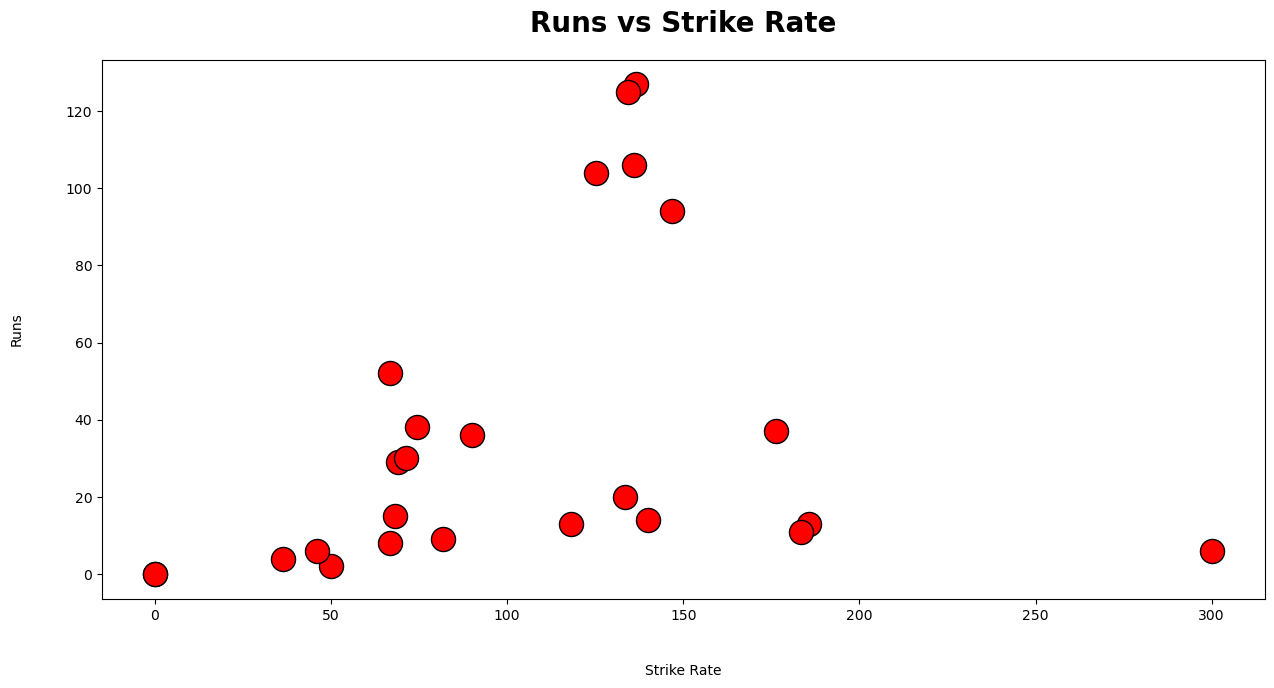

In [20]:
#strike rate vs the score of player in each match
plt.figure(figsize=(15,7))
x = bd_induvidual['SR']
y = bd_induvidual['Runs']
plt.xlabel('Strike Rate', labelpad=30)
plt.ylabel('Runs', labelpad=30)
plt.title('Runs vs Strike Rate', fontweight='bold', pad=20, fontsize=20)
plt.scatter(x, y, color='red', s=300, edgecolor='black')